In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data/Original Data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2019__Data_for_Calendar_Year_2018__20231026.csv",
              low_memory=False)
df.head()

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,Address 2,City,...,Last Modified Date - Water Meters,Generation Date,Release Date,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2018,1009970029,1022631,1155 Avenue of the Americas,Not Available,Manhattan,...,Not Available,4/30/2019 11:53,4/30/2019 11:57,MANHATTAN,40.756631,-73.982826,105.0,4.0,119.0,Midtown-Midtown South
1,8139,200,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2018,1013150001,1037545,200 East 42nd St.,Not Available,Manhattan,...,03/08/2019 09:50 AM EST,4/30/2019 11:53,4/30/2019 11:57,MANHATTAN,40.750698,-73.974306,106.0,4.0,88.0,Turtle Bay-East Midtown
2,8604,114,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2018,1009990019,1022667,114 West 47th st,Not Available,Manhattan,...,Not Available,4/30/2019 11:53,4/30/2019 11:57,MANHATTAN,40.758310,-73.982504,105.0,4.0,125.0,Midtown-Midtown South
3,8841,733,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2018,1013190047,1037596,733 Third Avenue,Not Available,Manhattan,...,Not Available,4/30/2019 11:53,4/30/2019 11:57,MANHATTAN,40.753074,-73.972753,106.0,4.0,90.0,Turtle Bay-East Midtown
4,11809,Conde Nast Building,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2018,1009950005,1085682,4 Times Square,Not Available,Manhattan,...,Not Available,4/30/2019 11:53,4/30/2019 11:57,MANHATTAN,40.756181,-73.986244,105.0,4.0,119.0,Midtown-Midtown South


In [3]:
df.shape

(25245, 253)

In [4]:
df.isna().sum()

Property Id               0
Property Name             0
Parent Property Id        0
Parent Property Name      0
Year Ending               0
                       ... 
Longitude               876
Community Board         876
Council District        876
Census Tract            876
NTA                     876
Length: 253, dtype: int64

### NA values are encoded as "Not Available" in the dataset.

In [5]:
df

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,Address 2,City,...,Last Modified Date - Water Meters,Generation Date,Release Date,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2018,1009970029,1022631,1155 Avenue of the Americas,Not Available,Manhattan,...,Not Available,4/30/2019 11:53,4/30/2019 11:57,MANHATTAN,40.756631,-73.982826,105.0,4.0,119.0,Midtown-Midtown South
1,8139,200,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2018,1013150001,1037545,200 East 42nd St.,Not Available,Manhattan,...,03/08/2019 09:50 AM EST,4/30/2019 11:53,4/30/2019 11:57,MANHATTAN,40.750698,-73.974306,106.0,4.0,88.0,Turtle Bay-East Midtown
2,8604,114,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2018,1009990019,1022667,114 West 47th st,Not Available,Manhattan,...,Not Available,4/30/2019 11:53,4/30/2019 11:57,MANHATTAN,40.758310,-73.982504,105.0,4.0,125.0,Midtown-Midtown South
3,8841,733,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2018,1013190047,1037596,733 Third Avenue,Not Available,Manhattan,...,Not Available,4/30/2019 11:53,4/30/2019 11:57,MANHATTAN,40.753074,-73.972753,106.0,4.0,90.0,Turtle Bay-East Midtown
4,11809,Conde Nast Building,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2018,1009950005,1085682,4 Times Square,Not Available,Manhattan,...,Not Available,4/30/2019 11:53,4/30/2019 11:57,MANHATTAN,40.756181,-73.986244,105.0,4.0,119.0,Midtown-Midtown South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25240,7538695,91 Davis Avenue and 102 Bard Avenue,7538695,91 Davis Avenue and 102 Bard Avenue,12/31/2018,5-00138-0258; 5-00138-0100,5003580; 5003529,91 Davis Avenue,Not Available,Staten Island,...,Not Available,8/1/2019 18:55,8/1/2019 18:56,STATEN IS,40.642078,-74.110312,501.0,49.0,97.0,West New Brighton-New Brighton-St. George
25241,7538696,Polyclinic,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2018,1-01041-0011,1082646,335 W 50 ST,Not Available,New York,...,08/01/2019 06:28 PM EDT,8/1/2019 18:34,8/1/2019 18:35,MANHATTAN,40.762996,-73.987766,104.0,3.0,133.0,Clinton
25242,7538772,1080 Holdings,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2018,4035410023,4085369,1080 Wyckoff Ave.,Not Available,Queens,...,Not Available,8/1/2019 23:23,8/1/2019 23:23,QUEENS,40.694625,-73.902417,405.0,34.0,559.0,Ridgewood
25243,7538791,Child1_Manhattan Beach,2670640,Parent_Manhattan Beach,12/31/2018,3871927,3245695,156 West End Avenue,Not Available,Brooklyn,...,Not Available,8/1/2019 23:21,8/1/2019 23:28,BROOKLYN,40.577836,-73.953079,315.0,48.0,61004.0,Brighton Beach


## Cleaning the Data

### There are many irrelevant and redundant features in the dataset which are of no use in our ultimate analysis. Hence, can be dropped safely

In [6]:
irr_features=['Parent Property Id', 'Parent Property Name', 'Year Ending', 'NYC Borough, Block and Lot (BBL)', 'NYC Building Identification Number (BIN)',
              'Address 2', 'List of All Property Use Types at Property', '2nd Largest Property Use Type','3rd Largest Property Use Type', 'ENERGY STAR Certification - Year(s) Certified',
             'ENERGY STAR Certification - Last Approval Date', 'ENERGY STAR Certification - Eligibility',  'Annual Maximum Demand (MM/YYYY)', 'Annual Maximum Demand (Meter Name (Meter ID))',
             'Estimated Data Flag - Electricity (Grid Purchase)', 'Estimated Data Flag - Natural Gas', 'Estimated Data Flag - Fuel Oil (No. 2)',
             'Estimated Data Flag - Fuel Oil (No. 4)', 'Estimated Data Flag - Fuel Oil (No. 5 and No. 6)', 'Estimated Data Flag - District Steam',
             'CoStar Property ID', 'LEED US Project ID', 'Estimated Data Flag -  Municipally Supplied Potable Water – Outdoor Use', 
             'Alert - Data Center Issue (with Estimates, IT Configuration, or IT Meter)', 'Alert - Gross Floor Area is 0 ft2',
             'Alert - Energy Meter has single entry more than 65 days', 'Alert - Energy Meter has overlaps','Alert - Energy Meter has gaps',
             'Alert - Energy Meter has less than 12 full calendar months of data', 'Alert - Energy - No meters selected for metrics',
             'Alert - Property has no uses', 'Data Quality Checker Run?', 'Data Quality Checker - Date Run', 'Default Values', 'Estimated Values - Energy',
             'Temporary Values', 'Estimated Values - Water', 'Water Current Date', 'Third Party Certification Date Anticipated', 'Third Party Certification',
             'Third Party Certification Date Achieved', 'Last Modified Date - Property', 'Last Modified Date - Electric Meters',
             'Last Modified Date - Gas Meters', 'Last Modified Date - Non-Electric Non-Gas Energy Meters', 'Last Modified Date - Water Meters',
             'Generation Date', 'Release Date', 'Community Board', 'Council District', 'Census Tract']
red_features=['City', 'County', 'Primary Property Type - Self Selected', 'National Median Reference Property Type',
              'Property GFA - Calculated (Buildings and Parking) (ft²)', 'Property GFA - Calculated (Buildings) (ft²)',
              'Property GFA - Calculated (Parking) (ft²)'
             ]


In [7]:
df.shape

(25245, 253)

In [8]:
df.drop(columns=irr_features, inplace=True)

In [9]:
df.drop(columns=red_features, inplace=True)

In [10]:
df.shape

(25245, 195)

### Converting "Not Available" values with NaN values

In [11]:
df.replace("Not Available", np.nan, inplace=True)

In [12]:
df.isna().sum().nlargest(20)

Kerosene Use (kBtu)                                                                                 25245
Convention Center - Gross Floor Area (ft²)                                                          25245
Convenience Store With Gas Station - Number of Open or Closed Refrigeration/Freezer Units           25245
Convenience Store With Gas Station - Open or Closed Refrigeration Density (Number per 1,000 ft²)    25245
Energy/Power Station - Gross Floor Area (ft²)                                                       25244
District Hot Water Use (kBtu)                                                                       25242
Data Center - PUE                                                                                   25242
Data Center - National Median PUE                                                                   25242
Propane Use (kBtu)                                                                                  25241
Ambulatory Surgical Center - Gross Floor Area 

### Finding features with null values greater than 80%

In [13]:
threshold=0.8
def find_pct_na(df):
    missing_pct=(df.isnull().sum())/len(df)
    cols_with_high_na=missing_pct[missing_pct>threshold].index.tolist()
    return cols_with_high_na

In [14]:
features_with_high_na=find_pct_na(df)
features_with_high_na

['3rd Largest Property Use Type - Gross Floor Area (ft²)',
 'Fuel Oil #1 Use (kBtu)',
 'Fuel Oil #2 Use (kBtu)',
 'Fuel Oil #4 Use (kBtu)',
 'Fuel Oil #5 & 6 Use (kBtu)',
 'Diesel #2 Use (kBtu)',
 'Kerosene Use (kBtu)',
 'Propane Use (kBtu)',
 'District Steam Use (kBtu)',
 'District Hot Water Use (kBtu)',
 'District Chilled Water Use (kBtu)',
 'Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kBtu)',
 'Electricity Use – Generated from Onsite Renewable Systems (kWh)',
 'Electricity Use – Generated from Onsite Renewable Systems and Exported (kWh)',
 'Annual Maximum Demand (kW)',
 'Green Power - Onsite (kWh)',
 'Avoided Emissions - Onsite Green Power (Metric Tons CO2e)',
 'Percent of RECs Retained',
 'Percent of Total Electricity Generated from Onsite Renewable Systems',
 'Ambulatory Surgical Center - Gross Floor Area (ft²)',
 'Automobile Dealership - Gross Floor Area (ft²)',
 'Bank Branch - Gross Floor Area (ft²)',
 'Bank Branch - Number of Computers',
 'College

In [15]:
def create_null_df(df):
    null_df=pd.DataFrame(df.isna().sum(), columns=['Null Count'])
    null_df=null_df[null_df['Null Count']>0].sort_values(by=['Null Count'], ascending=False)
    return null_df

In [16]:
create_null_df(df)

,Null Count
"Convenience Store With Gas Station - Open or Closed Refrigeration Density (Number per 1,000 ft²)",25245
Convention Center - Gross Floor Area (ft²),25245
Kerosene Use (kBtu),25245
Convenience Store With Gas Station - Number of Open or Closed Refrigeration/Freezer Units,25245
Energy/Power Station - Gross Floor Area (ft²),25244
...,...
Net Emissions (Metric Tons CO2e),202
eGRID Output Emissions Rate (kgCO2e/MBtu),25
Largest Property Use Type - Gross Floor Area (ft²),7
Largest Property Use Type,7


In [17]:
features_with_high_na.remove('3rd Largest Property Use Type - Gross Floor Area (ft²)')

In [18]:
df.drop(columns=features_with_high_na, inplace=True)

In [19]:
df.shape

(25245, 72)

In [20]:
multi_family_cols=['Multifamily Housing - Gross Floor Area (ft²)',
       'Multifamily Housing - Government Subsidized Housing',
       'Multifamily Housing - Number of Bedrooms',
       'Multifamily Housing - Number of Laundry Hookups in All Units',
       'Multifamily Housing - Number of Laundry Hookups in Common Area(s)',
       'Multifamily Housing - Total Number of Residential Living Units',
       'Multifamily Housing - Percent That Can Be Cooled',
       'Multifamily Housing - Percent That Can Be Heated',
       'Multifamily Housing - Resident Population Type',
       'Multifamily Housing - Number of Bedrooms Density (Number per 1,000 ft²)',
       'Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 ft²)',
       'Multifamily Housing - Number of Residential Living Units in a High-Rise Building (10 or more Stories)',
       'Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 ft²)',
       'Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories)',
       'Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 ft²)',]

In [21]:
df.drop(columns=multi_family_cols, inplace=True)

In [22]:
df.shape

(25245, 57)

In [23]:
create_null_df(df)

,Null Count
3rd Largest Property Use Type - Gross Floor Area (ft²),23473
2nd Largest Property Use - Gross Floor Area (ft²),19966
Water Score (Multifamily Only),16203
Metered Areas (Water),12649
Municipally Supplied Potable Water - Indoor Use (kgal),11491
Indoor Water Use (All Water Sources) (kgal),11486
Indoor Water Use Intensity (All Water Sources) (gal/ft²),11486
Water Use Intensity (All Water Sources) (gal/ft²),11062
Water Use (All Water Sources) (kgal),11062
Irrigated Area (ft²),7960


In [24]:
number_threshold=500
low_na_count=df.isna().sum()<500
features_with_low_na=low_na_count[low_na_count].index.tolist()


In [25]:
df.dropna(subset=features_with_low_na, how='any', inplace=True)
df.reset_index(drop=True, inplace=True)

In [26]:
df.shape

(24081, 57)

In [27]:
print('Column: Metered Areas (Energy)\n')
print(df['Metered Areas (Energy)'].value_counts())
print('------------'*10)
print('Column: Metered Areas (Water)\n')
print(df['Metered Areas  (Water)'].value_counts())

Column: Metered Areas (Energy)

Whole Building                                                                                                                          24028
Another configuration                                                                                                                      44
Common areas (all energy loads)                                                                                                             5
Tenant Plug Load/Electricity, Tenant Cooling, Common Area Plug Load/Electricity                                                             1
Common Area Plug Load/Electricity, Tenant Plug Load/Electricity, Tenant Cooling, Common Area Cooling                                        1
Tenant Hot Water, Tenant Heating, Common Area Heating, Common Area Plug Load/Electricity, Common Area Hot Water, Common Area Cooling        1
Common Area Cooling, Tenant Hot Water, Common Area Hot Water, Common Area Heating, Common Area Plug Load/Electricity

### As we can see, 'Whole Building' is the most dominant value. Filling its missing value with the median

In [28]:
categorical_col=['Metered Areas (Energy)', 'Metered Areas  (Water)']
for col in categorical_col:
    df[col]=df[col].fillna(df[col].mode().iloc[0])

In [29]:
create_null_df(df)

,Null Count
3rd Largest Property Use Type - Gross Floor Area (ft²),22344
2nd Largest Property Use - Gross Floor Area (ft²),18937
Water Score (Multifamily Only),15206
Municipally Supplied Potable Water - Indoor Use (kgal),10791
Indoor Water Use Intensity (All Water Sources) (gal/ft²),10788
Indoor Water Use (All Water Sources) (kgal),10788
Water Use (All Water Sources) (kgal),10376
Water Use Intensity (All Water Sources) (gal/ft²),10376
Irrigated Area (ft²),7457
Source Energy Use - Adjusted to Current Year (kBtu),3967


### Correcting the datatypes of the features

In [30]:
obj_features=df.select_dtypes('object').columns
int_features=df.select_dtypes('int64').columns
float_features=df.select_dtypes('float64').columns

In [31]:
obj_features

Index(['Property Name', 'Address 1', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)',
       '% Difference from National Median Site EUI', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)',
       '% Difference from National Median Source EUI',
       'S

In [32]:
int_features

Index(['Property Id', 'Number of Buildings', 'Occupancy'], dtype='object')

In [33]:
feature_dtypes_to_change=[
        'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)','ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)',
       '% Difference from National Median Site EUI', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)',
       '% Difference from National Median Source EUI',
       'Source Energy Use - Adjusted to Current Year (kBtu)',
       'Source Energy Use (kBtu)',
       'Weather Normalized Source Energy Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Electricity Use - Grid Purchase (kWh)',
       'Weather Normalized Site Electricity (kWh)',
       'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)',
       'Green Power - Offsite (kWh)',
       'Avoided Emissions - Offsite Green Power (Metric Tons CO2e)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)',
       'National Median Total GHG Emissions (Metric Tons CO2e)',
       'eGRID Output Emissions Rate (kgCO2e/MBtu)',
       'Net Emissions (Metric Tons CO2e)',
       'Percent of Electricity that is Green Power',
       'Water Use (All Water Sources) (kgal)',
       'Indoor Water Use (All Water Sources) (kgal)',
       'Indoor Water Use Intensity (All Water Sources) (gal/ft²)',
       'Municipally Supplied Potable Water - Indoor Use (kgal)',
       'Water Use Intensity (All Water Sources) (gal/ft²)',
       'Water Score (Multifamily Only)', 'Irrigated Area (ft²)']

In [34]:
df[feature_dtypes_to_change]=df[feature_dtypes_to_change].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [35]:
df.dtypes.value_counts()

float64    43
object     11
int64       3
dtype: int64

In [36]:
df.select_dtypes('object').columns

Index(['Property Name', 'Address 1', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated',
       'Largest Property Use Type', 'Year Built', 'Metered Areas (Energy)',
       'Metered Areas  (Water)', 'Property GFA - Self-Reported (ft²)',
       'Borough', 'NTA'],
      dtype='object')

In [37]:
df['Year Built']

0        1,982
1        1,956
2        1,989
3        1,961
4        1,999
         ...  
24076    1,966
24077    1,931
24078    1,961
24079    1,965
24080    2,018
Name: Year Built, Length: 24081, dtype: object

In [38]:
df['Property GFA - Self-Reported (ft²)']

0          686,838
1          384,432
2          577,534
3          390,878
4        1,601,977
           ...    
24076       62,160
24077       26,250
24078       52,820
24079      150,000
24080       49,584
Name: Property GFA - Self-Reported (ft²), Length: 24081, dtype: object

### Above two features have inconsistent formats. Hence it needs to be corrected

In [39]:
df['Year Built']=df['Year Built'].str.replace(',','').astype('int64')
df['Year Built']

0        1982
1        1956
2        1989
3        1961
4        1999
         ... 
24076    1966
24077    1931
24078    1961
24079    1965
24080    2018
Name: Year Built, Length: 24081, dtype: int64

In [40]:
df['Property GFA - Self-Reported (ft²)']=df['Property GFA - Self-Reported (ft²)'].str.replace(',','').astype('float64')
df['Property GFA - Self-Reported (ft²)']

0         686838.0
1         384432.0
2         577534.0
3         390878.0
4        1601977.0
           ...    
24076      62160.0
24077      26250.0
24078      52820.0
24079     150000.0
24080      49584.0
Name: Property GFA - Self-Reported (ft²), Length: 24081, dtype: float64

In [41]:
df.select_dtypes('object').columns

Index(['Property Name', 'Address 1', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated',
       'Largest Property Use Type', 'Metered Areas (Energy)',
       'Metered Areas  (Water)', 'Borough', 'NTA'],
      dtype='object')

### Combining 'Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use - Gross Floor Area (ft²)' and '3rd Largest Property Use Type - Gross Floor Area (ft²)' into a single column 'Total GFA'

In [42]:
df[['Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use - Gross Floor Area (ft²)', 
  '3rd Largest Property Use Type - Gross Floor Area (ft²)']]

,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²)
0,680478.9,5227.0,NaN
1,366528.0,15789.0,2115.0
2,577534.0,NaN,NaN
3,393087.2,NaN,NaN
4,1539113.0,62864.0,NaN
...,...,...,...
24076,62160.0,NaN,NaN
24077,26250.0,NaN,NaN
24078,52820.0,NaN,NaN
24079,150000.0,NaN,NaN


In [43]:
df['Total GFA (ft2)']=df[['Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use - Gross Floor Area (ft²)',
                           '3rd Largest Property Use Type - Gross Floor Area (ft²)']].sum(axis=1, skipna=True)

In [44]:
df[['Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use - Gross Floor Area (ft²)', 
  '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Total GFA (ft2)']]

,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Total GFA (ft2)
0,680478.9,5227.0,NaN,685705.9
1,366528.0,15789.0,2115.0,384432.0
2,577534.0,NaN,NaN,577534.0
3,393087.2,NaN,NaN,393087.2
4,1539113.0,62864.0,NaN,1601977.0
...,...,...,...,...
24076,62160.0,NaN,NaN,62160.0
24077,26250.0,NaN,NaN,26250.0
24078,52820.0,NaN,NaN,52820.0
24079,150000.0,NaN,NaN,150000.0


In [45]:
df.drop(columns=[
    'Largest Property Use Type - Gross Floor Area (ft²)', 
    '2nd Largest Property Use - Gross Floor Area (ft²)', 
    '3rd Largest Property Use Type - Gross Floor Area (ft²)'
], inplace=True)

In [46]:
create_null_df(df)

,Null Count
Water Score (Multifamily Only),15206
Municipally Supplied Potable Water - Indoor Use (kgal),10791
Indoor Water Use (All Water Sources) (kgal),10788
Indoor Water Use Intensity (All Water Sources) (gal/ft²),10788
Water Use Intensity (All Water Sources) (gal/ft²),10376
Water Use (All Water Sources) (kgal),10376
Irrigated Area (ft²),7457
Source Energy Use - Adjusted to Current Year (kBtu),3967
ENERGY STAR Score,3964
Weather Normalized Site Natural Gas Intensity (therms/ft²),2585


In [47]:
df[['Direct GHG Emissions (Metric Tons CO2e)', 'Indirect GHG Emissions (Metric Tons CO2e)', 
    'Total GHG Emissions (Metric Tons CO2e)', 'Net Emissions (Metric Tons CO2e)']]

,Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Total GHG Emissions (Metric Tons CO2e),Net Emissions (Metric Tons CO2e)
0,0.0,2520.9,2520.9,2520.9
1,0.0,2895.1,2895.1,2895.1
2,51.2,3104.7,3155.8,3155.8
3,0.0,2826.2,2826.2,2826.2
4,1991.7,10187.6,12179.3,12179.3
...,...,...,...,...
24076,0.0,19.8,19.8,19.8
24077,0.0,97.7,97.7,97.7
24078,376.8,66.0,442.8,442.8
24079,278.9,508.1,787.0,787.0


### As we can see, 'Net Emissions (Metric Tons CO2e)' is basically the sum of '	Direct GHG Emissions (Metric Tons CO2e)', 'Indirect GHG Emissions (Metric Tons CO2e)' and similar to 'Total GHG Emissions (Metric Tons CO2e)'. Hence we can safely drop those features

In [48]:
red_features=[
    'Direct GHG Emissions (Metric Tons CO2e)', 'Indirect GHG Emissions (Metric Tons CO2e)', 
    'Total GHG Emissions (Metric Tons CO2e)'
]
df.drop(columns=red_features, inplace=True)

In [49]:
df.shape

(24081, 52)

In [50]:
create_null_df(df)

,Null Count
Water Score (Multifamily Only),15206
Municipally Supplied Potable Water - Indoor Use (kgal),10791
Indoor Water Use (All Water Sources) (kgal),10788
Indoor Water Use Intensity (All Water Sources) (gal/ft²),10788
Water Use Intensity (All Water Sources) (gal/ft²),10376
Water Use (All Water Sources) (kgal),10376
Irrigated Area (ft²),7457
Source Energy Use - Adjusted to Current Year (kBtu),3967
ENERGY STAR Score,3964
Weather Normalized Site Natural Gas Intensity (therms/ft²),2585


In [51]:
df[df['Water Score (Multifamily Only)'].isna()==False][['Primary Property Type - Portfolio Manager-Calculated', 'Water Score (Multifamily Only)']]['Primary Property Type - Portfolio Manager-Calculated'].unique()

array(['Multifamily Housing'], dtype=object)

### As we can see from above code, the feature 'Water Score (Multifamily Only)' is only recorded when the feature 'Primary Property Type - Portfolio Manager-Calculated' is 'Multifamily Housing'. Hence, we will fill the null values in feature 'Water Score (Multifamily Only)' to 0 when the 'Primary Property Type - Portfolio Manager-Calculated' is not 'Multifamily Housing'

In [52]:
df.loc[df['Primary Property Type - Portfolio Manager-Calculated']!='Multifamily Housing',
      'Water Score (Multifamily Only)']=0

In [53]:
create_null_df(df)

,Null Count
Municipally Supplied Potable Water - Indoor Use (kgal),10791
Indoor Water Use (All Water Sources) (kgal),10788
Indoor Water Use Intensity (All Water Sources) (gal/ft²),10788
Water Use Intensity (All Water Sources) (gal/ft²),10376
Water Use (All Water Sources) (kgal),10376
Water Score (Multifamily Only),7869
Irrigated Area (ft²),7457
Source Energy Use - Adjusted to Current Year (kBtu),3967
ENERGY STAR Score,3964
Weather Normalized Site Natural Gas Intensity (therms/ft²),2585


### We can drop 'Largest Property Use Type' as we already have 'Primary Property Type - Portfolio Manager-Calculated' in our dataset

In [54]:
red_features=['Largest Property Use Type']
df.drop(columns=red_features, inplace=True)

In [55]:
create_null_df(df)

,Null Count
Municipally Supplied Potable Water - Indoor Use (kgal),10791
Indoor Water Use (All Water Sources) (kgal),10788
Indoor Water Use Intensity (All Water Sources) (gal/ft²),10788
Water Use Intensity (All Water Sources) (gal/ft²),10376
Water Use (All Water Sources) (kgal),10376
Water Score (Multifamily Only),7869
Irrigated Area (ft²),7457
Source Energy Use - Adjusted to Current Year (kBtu),3967
ENERGY STAR Score,3964
Weather Normalized Site Natural Gas Intensity (therms/ft²),2585


### We have no information about location for around 800 records. This records are low in number compared to our overall length of the dataset. Hence dropping those null records

In [56]:
df.dropna(subset=['Latitude', 'Longitude', 'NTA', 'Borough'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [57]:
df.shape

(23268, 51)

In [58]:
create_null_df(df)

,Null Count
Municipally Supplied Potable Water - Indoor Use (kgal),10382
Indoor Water Use Intensity (All Water Sources) (gal/ft²),10380
Indoor Water Use (All Water Sources) (kgal),10380
Water Use Intensity (All Water Sources) (gal/ft²),9984
Water Use (All Water Sources) (kgal),9984
Water Score (Multifamily Only),7616
Irrigated Area (ft²),7138
Source Energy Use - Adjusted to Current Year (kBtu),3755
ENERGY STAR Score,3752
Weather Normalized Site Natural Gas Use (therms),2480


### For columns 'Percent of Electricity that is Green Power', 'Green Power - Offsite (kWh)', 'Avoided Emissions - Offsite Green Power (Metric Tons CO2e)' and 'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)', there is no reliable way to impute its missing value because some buildings have zero intake of renewable energy and some have disproportionately high consumption of green energy. If we use median/mean, we risk giving values to properties that even don't have any onsite or offsite green energy consumption. Hence, dropping those records is the most suitable way to handle its missing values

In [59]:
green_energy_features=[
    'Percent of Electricity that is Green Power', 'Green Power - Offsite (kWh)',
    'Avoided Emissions - Offsite Green Power (Metric Tons CO2e)', 'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)'
]
df.dropna(subset=green_energy_features, inplace=True)

In [60]:
df.reset_index(drop=True, inplace=True)

In [61]:
df

,Property Id,Property Name,Address 1,Postcode,Primary Property Type - Portfolio Manager-Calculated,Year Built,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),...,Indoor Water Use Intensity (All Water Sources) (gal/ft²),Municipally Supplied Potable Water - Indoor Use (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Water Score (Multifamily Only),Irrigated Area (ft²),Borough,Latitude,Longitude,NTA,Total GFA (ft2)
0,7365,1155,1155 Avenue of the Americas,10036,Office,1982,1,40,Whole Building,Whole Building,...,NaN,NaN,NaN,0.0,NaN,MANHATTAN,40.756631,-73.982826,Midtown-Midtown South,685705.9
1,8139,200,200 East 42nd St.,10017,Office,1956,1,100,Whole Building,Whole Building,...,18.87,7252.6,18.87,0.0,NaN,MANHATTAN,40.750698,-73.974306,Turtle Bay-East Midtown,384432.0
2,8604,114,114 West 47th st,10036,Financial Office,1989,1,95,Whole Building,Whole Building,...,NaN,NaN,NaN,0.0,NaN,MANHATTAN,40.758310,-73.982504,Midtown-Midtown South,577534.0
3,8841,733,733 Third Avenue,10017,Office,1961,1,100,Whole Building,Whole Building,...,NaN,NaN,NaN,0.0,NaN,MANHATTAN,40.753074,-73.972753,Turtle Bay-East Midtown,393087.2
4,11809,Conde Nast Building,4 Times Square,10036,Office,1999,1,100,Whole Building,Whole Building,...,NaN,NaN,NaN,0.0,NaN,MANHATTAN,40.756181,-73.986244,Midtown-Midtown South,1601977.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22998,7538500,100 Belmont Place,100 Belmont Place,10301,Multifamily Housing,1966,2,100,"Common Area Cooling, Tenant Hot Water, Common ...",Whole Building,...,NaN,NaN,NaN,NaN,0.0,STATEN IS,40.642636,-74.079663,West New Brighton-New Brighton-St. George,62160.0
22999,7538585,175 WEST 137 STREET,175 WEST 137 STREET,10030,Office,1931,1,100,Whole Building,Whole Building,...,50.04,1313.6,50.04,0.0,NaN,MANHATTAN,40.816205,-73.941795,Central Harlem North-Polo Grounds,26250.0
23000,7538695,91 Davis Avenue and 102 Bard Avenue,91 Davis Avenue,10310,Multifamily Housing,1961,6,100,Whole Building,Whole Building,...,55.01,2905.4,55.01,56.0,0.0,STATEN IS,40.642078,-74.110312,West New Brighton-New Brighton-St. George,52820.0
23001,7538696,Polyclinic,335 W 50 ST,10019,Multifamily Housing,1965,1,95,Whole Building,Whole Building,...,70.30,10544.7,70.30,19.0,0.0,MANHATTAN,40.762996,-73.987766,Clinton,150000.0


### Visualizing the distribution of values using box plot for the features in above dataframe

In [62]:
null_df=create_null_df(df)
features_to_viz=null_df.index.tolist()
features_to_viz

['Municipally Supplied Potable Water - Indoor Use (kgal)',
 'Indoor Water Use Intensity (All Water Sources) (gal/ft²)',
 'Indoor Water Use (All Water Sources) (kgal)',
 'Water Use (All Water Sources) (kgal)',
 'Water Use Intensity (All Water Sources) (gal/ft²)',
 'Water Score (Multifamily Only)',
 'Irrigated Area (ft²)',
 'Source Energy Use - Adjusted to Current Year (kBtu)',
 'ENERGY STAR Score',
 'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
 'Weather Normalized Site Natural Gas Use (therms)',
 'Natural Gas Use (kBtu)',
 'Weather Normalized Site EUI (kBtu/ft²)',
 'Weather Normalized Source Energy Use (kBtu)',
 'Weather Normalized Source EUI (kBtu/ft²)',
 'Weather Normalized Site Energy Use (kBtu)',
 'Weather Normalized Site Electricity (kWh)',
 'Weather Normalized Site Electricity Intensity (kWh/ft²)']

In [63]:
len(features_to_viz)

18

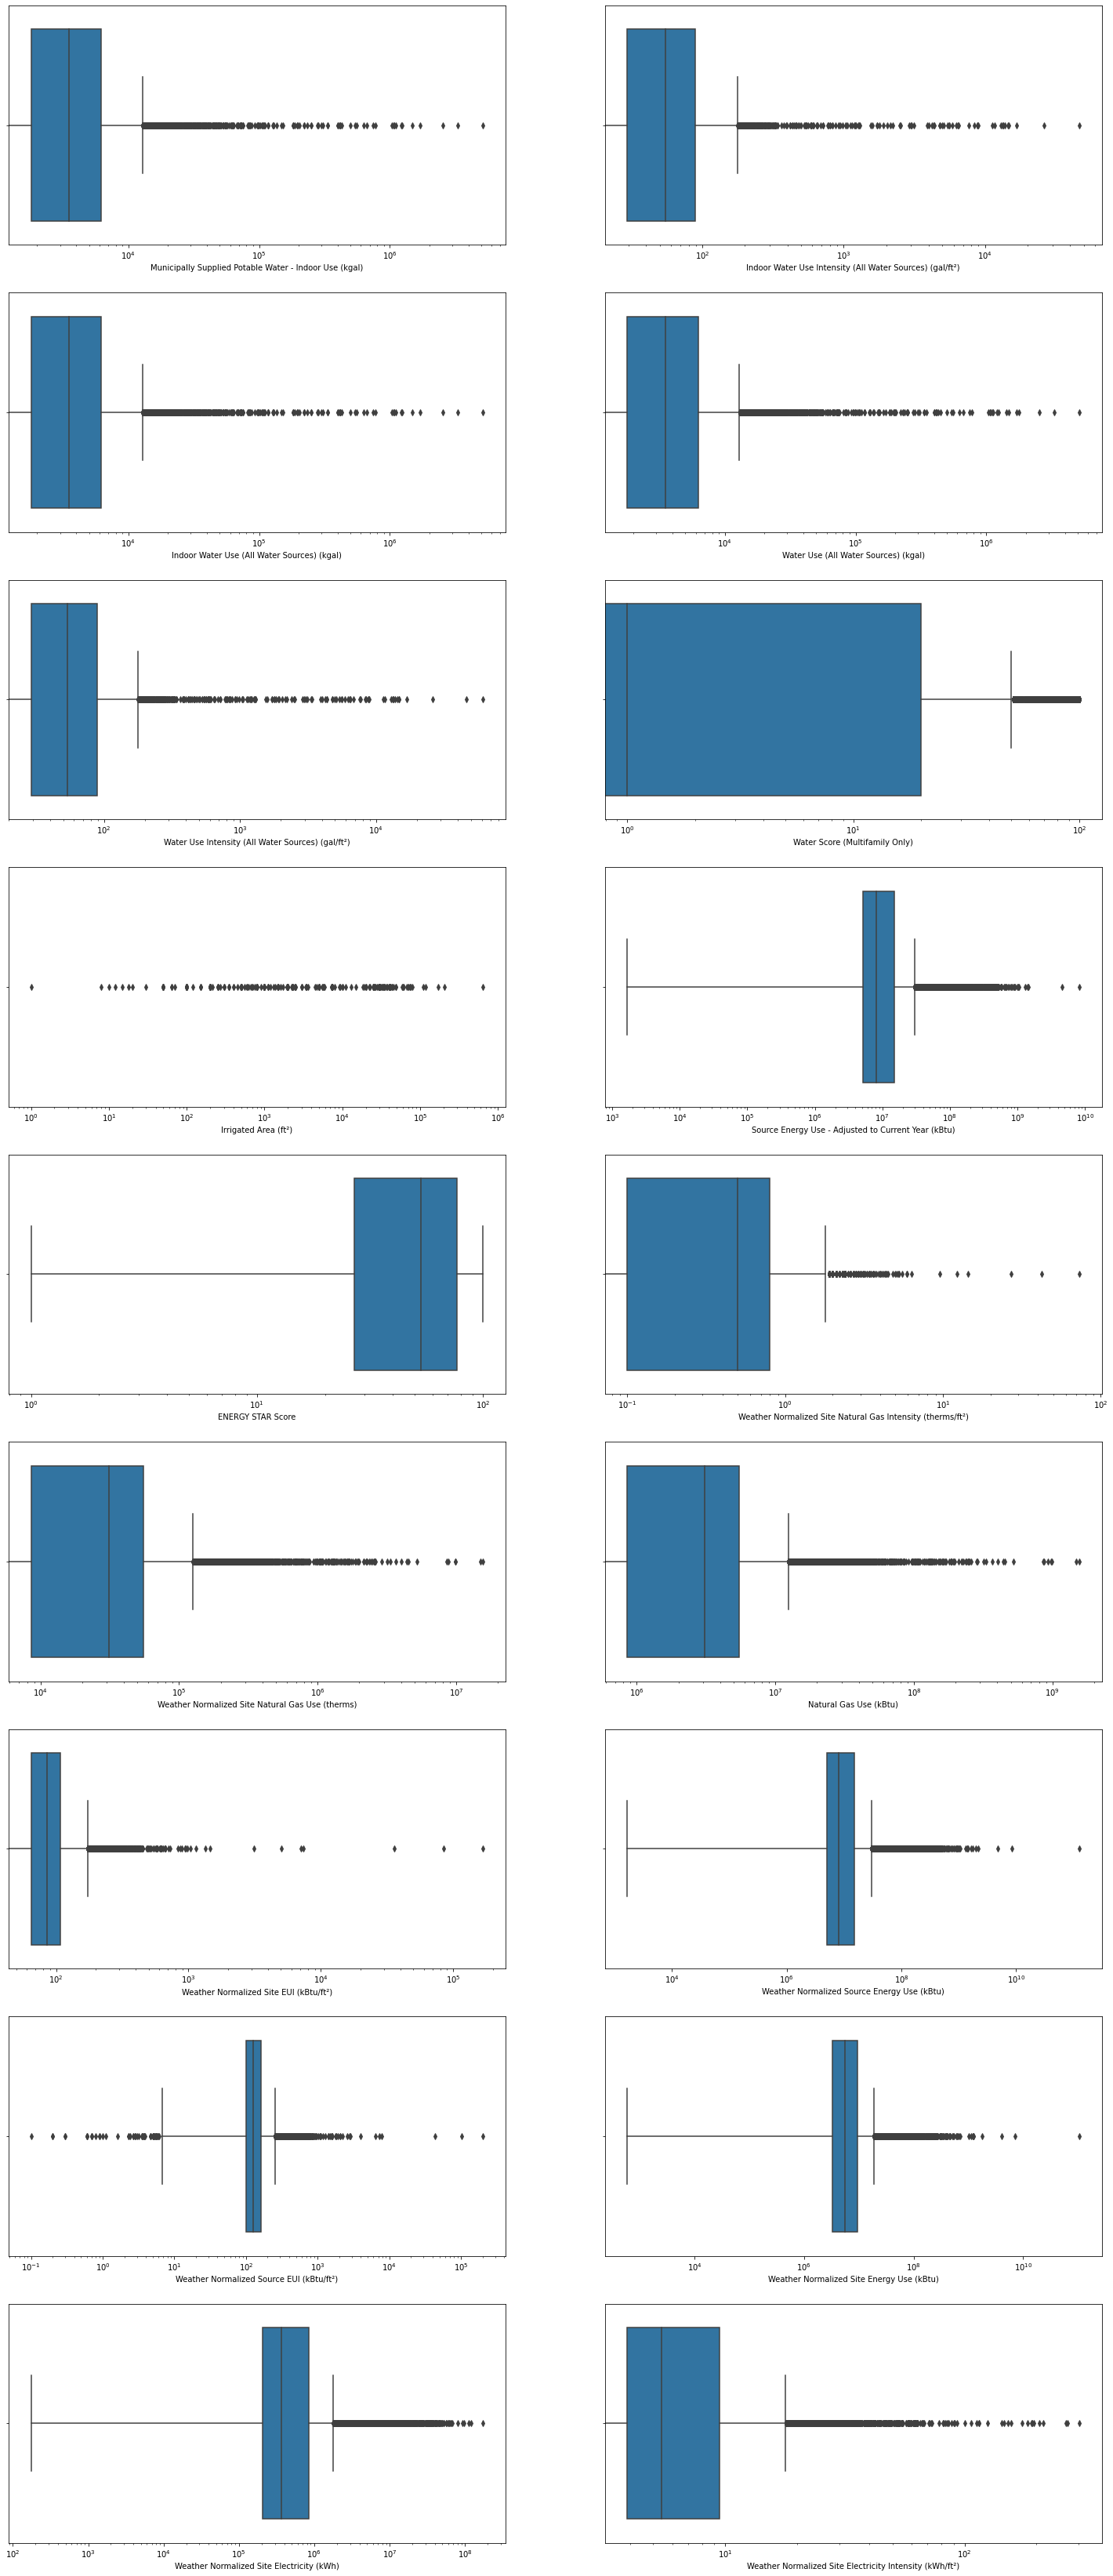

In [64]:
plt.figure(figsize=(25, 100))
for index, column in enumerate(features_to_viz, 1):
    plt.subplot(15, 2, index)
    sns.boxplot(x=df[column])
    plt.xscale('log')
    plt.plot()


### There are outliers in all those features. Hence filling missing values with median as per their corresponding property use type is the most logical way

In [65]:
features_to_viz

['Municipally Supplied Potable Water - Indoor Use (kgal)',
 'Indoor Water Use Intensity (All Water Sources) (gal/ft²)',
 'Indoor Water Use (All Water Sources) (kgal)',
 'Water Use (All Water Sources) (kgal)',
 'Water Use Intensity (All Water Sources) (gal/ft²)',
 'Water Score (Multifamily Only)',
 'Irrigated Area (ft²)',
 'Source Energy Use - Adjusted to Current Year (kBtu)',
 'ENERGY STAR Score',
 'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
 'Weather Normalized Site Natural Gas Use (therms)',
 'Natural Gas Use (kBtu)',
 'Weather Normalized Site EUI (kBtu/ft²)',
 'Weather Normalized Source Energy Use (kBtu)',
 'Weather Normalized Source EUI (kBtu/ft²)',
 'Weather Normalized Site Energy Use (kBtu)',
 'Weather Normalized Site Electricity (kWh)',
 'Weather Normalized Site Electricity Intensity (kWh/ft²)']

In [66]:
for column in features_to_viz:
    median_values = df.groupby('Primary Property Type - Portfolio Manager-Calculated')[column].median()
    df[column] = df.apply(lambda row: median_values[row['Primary Property Type - Portfolio Manager-Calculated']] if pd.isna(row[column]) else row[column], axis=1)

In [67]:
create_null_df(df)

,Null Count
ENERGY STAR Score,1566
Source Energy Use - Adjusted to Current Year (kBtu),1566
Irrigated Area (ft²),365
Indoor Water Use (All Water Sources) (kgal),183
Indoor Water Use Intensity (All Water Sources) (gal/ft²),183
Municipally Supplied Potable Water - Indoor Use (kgal),183
Water Use (All Water Sources) (kgal),159
Water Use Intensity (All Water Sources) (gal/ft²),159
Weather Normalized Site Natural Gas Intensity (therms/ft²),9
Weather Normalized Site Natural Gas Use (therms),9


### The rest of the null values are due to no corresponding median values available for that specific property type in the original dataset. Hence, the most appropriate way is to fill them is with the median for the specific borough

In [68]:
null_features=create_null_df(df).index.tolist()
null_features

['ENERGY STAR Score',
 'Source Energy Use - Adjusted to Current Year (kBtu)',
 'Irrigated Area (ft²)',
 'Indoor Water Use (All Water Sources) (kgal)',
 'Indoor Water Use Intensity (All Water Sources) (gal/ft²)',
 'Municipally Supplied Potable Water - Indoor Use (kgal)',
 'Water Use (All Water Sources) (kgal)',
 'Water Use Intensity (All Water Sources) (gal/ft²)',
 'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
 'Weather Normalized Site Natural Gas Use (therms)',
 'Natural Gas Use (kBtu)',
 'Weather Normalized Site EUI (kBtu/ft²)',
 'Weather Normalized Site Energy Use (kBtu)',
 'Weather Normalized Source EUI (kBtu/ft²)',
 'Weather Normalized Source Energy Use (kBtu)']

In [69]:
for column in null_features:
    median_values = df.groupby('Borough')[column].median()
    df[column] = df.apply(lambda row: median_values[row['Borough']] if pd.isna(row[column]) else row[column], axis=1)

In [70]:
df.isna().sum()

Property Id                                                                           0
Property Name                                                                         0
Address 1                                                                             0
Postcode                                                                              0
Primary Property Type - Portfolio Manager-Calculated                                  0
Year Built                                                                            0
Number of Buildings                                                                   0
Occupancy                                                                             0
Metered Areas (Energy)                                                                0
Metered Areas  (Water)                                                                0
ENERGY STAR Score                                                                     0
Site EUI (kBtu/ft²)             

In [71]:
def findInconsistendPostCode(df):
    inconsistent_df=df[df['Postcode'].str.len()>5][['Postcode', 'Borough', 'Property Name']]
    return inconsistent_df

ic_df=findInconsistendPostCode(df)
ic_df

,Postcode,Borough,Property Name
1392,111011128,QUEENS,Krinos Foods LLC
1561,100381836,MANHATTAN,St. Margaret's House
1642,110401433,QUEENS,Parker Jewish Institute For Health Care & Reha...
1675,100224612,MANHATTAN,Hotel Elysee
2135,104537842,BRONX,Davidson
2159,100028021,MANHATTAN,Gouverneur
2243,104542130,BRONX,Thessalonica Court
2884,100168402,MANHATTAN,124 east 28th street - Park South Hotel
2917,112013873,BROOKLYN,1 MTC
3059,112213612,BROOKLYN,Brooklyn Excelsior Charter School


### As we can see, we have inconsistencies in Postcode length where some records have length greater than 5. Hence, we need to correct them

In [72]:
ic_df[ic_df['Borough']=='MANHATTAN']

,Postcode,Borough,Property Name
1561,100381836,MANHATTAN,St. Margaret's House
1675,100224612,MANHATTAN,Hotel Elysee
2159,100028021,MANHATTAN,Gouverneur
2884,100168402,MANHATTAN,124 east 28th street - Park South Hotel
4836,100016905,MANHATTAN,"Via 27, LLC"
5364,100750264,MANHATTAN,79th Street Associates
6263,100196852,MANHATTAN,Winter Garden
7447,100182706,MANHATTAN,452 Fifth Ave
7448,100183801,MANHATTAN,1 W 39th Street
7464,100122500,MANHATTAN,New York University: Washington Square


In [73]:
#Correcting ZIP Codes for 'Manhattan' Borough

mask_manhattan=(df['Postcode'].str.len()>5) & (df['Borough']=='MANHATTAN')
mask_manhattan_df=df[mask_manhattan][['Postcode', 'Property Name','NTA', 'Borough']]
mask_manhattan_df['Postcode']=mask_manhattan_df['Postcode'].str[:5]
df.loc[mask_manhattan, 'Postcode']=mask_manhattan_df['Postcode']
df[df['Postcode'].str.len()>5][['Postcode', 'Borough']]

,Postcode,Borough
1392,111011128,QUEENS
1642,110401433,QUEENS
2135,104537842,BRONX
2243,104542130,BRONX
2917,112013873,BROOKLYN
3059,112213612,BROOKLYN
3936,103145307,STATEN IS
4232,112073442,BROOKLYN
4248,104601022,BRONX
4805,104541907,BRONX


In [74]:
#Correcting ZIP Codes for 'Queens' Borough

mask_queens=(df['Postcode'].str.len()>5) & (df['Borough']=='QUEENS')
mask_queens_df=df[mask_queens][['Postcode', 'Property Name','NTA', 'Borough']]
mask_queens_df['Postcode']=mask_queens_df['Postcode'].str[:5]
df.loc[mask_queens, 'Postcode']=mask_queens_df['Postcode']
df[df['Postcode'].str.len()>5][['Postcode', 'Borough']]

,Postcode,Borough
2135,104537842,BRONX
2243,104542130,BRONX
2917,112013873,BROOKLYN
3059,112213612,BROOKLYN
3936,103145307,STATEN IS
4232,112073442,BROOKLYN
4248,104601022,BRONX
4805,104541907,BRONX
5586,112111708,BROOKLYN
5587,112111708,BROOKLYN


In [75]:
#Correcting ZIP Codes for 'Bronx' Borough

mask_bronx=(df['Postcode'].str.len()>5) & (df['Borough']=='BRONX')
mask_bronx_df=df[mask_bronx][['Postcode', 'Property Name','NTA', 'Borough']]
mask_bronx_df['Postcode']=mask_bronx_df['Postcode'].str[:5]
df.loc[mask_bronx, 'Postcode']=mask_bronx_df['Postcode']
df[df['Postcode'].str.len()>5][['Postcode', 'Borough']]

,Postcode,Borough
2917,112013873,BROOKLYN
3059,112213612,BROOKLYN
3936,103145307,STATEN IS
4232,112073442,BROOKLYN
5586,112111708,BROOKLYN
5587,112111708,BROOKLYN
7080,112063812,BROOKLYN
11889,112074037,BROOKLYN
11890,112074037,BROOKLYN


In [76]:
#Correcting ZIP Codes for 'Brooklyn' Borough

mask_brooklyn=(df['Postcode'].str.len()>5) & (df['Borough']=='BROOKLYN')
mask_brooklyn_df=df[mask_brooklyn][['Postcode', 'Property Name','NTA', 'Borough']]
mask_brooklyn_df['Postcode']=mask_brooklyn_df['Postcode'].str[:5]
df.loc[mask_brooklyn, 'Postcode']=mask_brooklyn_df['Postcode']
df[df['Postcode'].str.len()>5][['Postcode', 'Borough']]

,Postcode,Borough
3936,103145307,STATEN IS


In [77]:
#Correcting ZIP Codes for 'Staten Island' Borough

mask_staten=(df['Postcode'].str.len()>5) & (df['Borough']=='STATEN IS')
mask_staten_df=df[mask_staten][['Postcode', 'Property Name','NTA', 'Borough']]
mask_staten_df['Postcode']=mask_staten_df['Postcode'].str[:5]
df.loc[mask_staten, 'Postcode']=mask_staten_df['Postcode']
df[df['Postcode'].str.len()>5][['Postcode', 'Borough']]

,Postcode,Borough


In [78]:
df[df['Postcode'].str.len()>5]

,Property Id,Property Name,Address 1,Postcode,Primary Property Type - Portfolio Manager-Calculated,Year Built,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),...,Indoor Water Use Intensity (All Water Sources) (gal/ft²),Municipally Supplied Potable Water - Indoor Use (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Water Score (Multifamily Only),Irrigated Area (ft²),Borough,Latitude,Longitude,NTA,Total GFA (ft2)


In [79]:
df.shape

(23003, 51)

In [80]:
df.columns

Index(['Property Id', 'Property Name', 'Address 1', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated', 'Year Built',
       'Number of Buildings', 'Occupancy', 'Metered Areas (Energy)',
       'Metered Areas  (Water)', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)',
       '% Difference from National Median Site EUI', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)',
       '% Difference from National Median Source EUI',
       'Source Energy Use - Adjusted to Current Year (kBtu)',
       'Source Energy Use (kBtu)',
       'Weather Normalized Source Energy Use (kBtu)', 'Natural Gas Use (kBtu

### Inspecting the 'Year Built' feature

In [81]:
df['Year Built'].describe()

count    23003.000000
mean      1947.451767
std         33.719349
min       1051.000000
25%       1925.000000
50%       1936.000000
75%       1967.000000
max       2020.000000
Name: Year Built, dtype: float64

In [82]:
df['Year Built'].nsmallest(10)

18453    1051
20440    1393
3003     1600
11122    1649
11190    1800
14838    1801
14738    1811
13364    1815
2236     1827
17999    1832
Name: Year Built, dtype: int64

In [83]:
df['Postcode']

0        10036
1        10017
2        10036
3        10017
4        10036
         ...  
22998    10301
22999    10030
23000    10310
23001    10019
23002    11385
Name: Postcode, Length: 23003, dtype: object

In [84]:
df.loc[[18453, 20440, 3003, 11122], ['Property Name', 'Address 1', 'Year Built', 'Postcode', 'Borough']]

,Property Name,Address 1,Year Built,Postcode,Borough
18453,Rocklyn: 52-29 83rd St,5217 83 ST,1051,11373,QUEENS
20440,Queens Quality Management - 6541 Booth st,6541 Booth st,1393,11374,QUEENS
3003,JEMB - 150 Broadway,150 Broadway,1600,10038,MANHATTAN
11122,East Island Mgmt,10236 64th Avenue,1649,11375,QUEENS


### The above values for 'Year Built' is not correct. Hence manually correcting them using actual values from internet

In [85]:
df.loc[20440, 'Year Built']=1939

In [86]:
df.loc[[18453, 20440, 3003, 11122], ['Property Name', 'Address 1', 'Year Built', 'Postcode', 'Borough']]

,Property Name,Address 1,Year Built,Postcode,Borough
18453,Rocklyn: 52-29 83rd St,5217 83 ST,1051,11373,QUEENS
20440,Queens Quality Management - 6541 Booth st,6541 Booth st,1939,11374,QUEENS
3003,JEMB - 150 Broadway,150 Broadway,1600,10038,MANHATTAN
11122,East Island Mgmt,10236 64th Avenue,1649,11375,QUEENS


In [87]:
df.loc[3003, 'Year Built']=1924

In [88]:
df.loc[[18453, 20440, 3003, 11122], ['Property Name', 'Address 1', 'Year Built', 'Postcode', 'Borough']]

,Property Name,Address 1,Year Built,Postcode,Borough
18453,Rocklyn: 52-29 83rd St,5217 83 ST,1051,11373,QUEENS
20440,Queens Quality Management - 6541 Booth st,6541 Booth st,1939,11374,QUEENS
3003,JEMB - 150 Broadway,150 Broadway,1924,10038,MANHATTAN
11122,East Island Mgmt,10236 64th Avenue,1649,11375,QUEENS


In [89]:
df.loc[11122, 'Year Built']=1949

In [90]:
df.loc[18453, 'Year Built']=1951

In [91]:
df.loc[[18453, 20440, 3003, 11122], ['Property Name', 'Address 1', 'Year Built', 'Postcode', 'Borough']]

,Property Name,Address 1,Year Built,Postcode,Borough
18453,Rocklyn: 52-29 83rd St,5217 83 ST,1951,11373,QUEENS
20440,Queens Quality Management - 6541 Booth st,6541 Booth st,1939,11374,QUEENS
3003,JEMB - 150 Broadway,150 Broadway,1924,10038,MANHATTAN
11122,East Island Mgmt,10236 64th Avenue,1949,11375,QUEENS


In [92]:
df['Year Built'].describe()

count    23003.000000
mean      1947.541755
std         32.857134
min       1800.000000
25%       1925.000000
50%       1936.000000
75%       1967.000000
max       2020.000000
Name: Year Built, dtype: float64

In [93]:
df.reset_index(drop=True, inplace=True)

In [94]:
df.shape

(23003, 51)

### Our Dataset 1 is completely cleaned